# Import libraries and data

Collaborative Filtering (CF) recommends based on the similarity of users. CF works well when we have enough inputs for the users. So, when there is no or very few inputs for a user then it can not provide reliable output. This is known as cold-start problem, which is not the case for content based recommendation. Because content based recommendation works based on the items, and we always have enough information about items.

In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

user_ratings = pd.read_csv('data/ratings_small.csv.zip')
user_ratings

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205
...,...,...,...,...
99999,671,6268,2.5,1065579370
100000,671,6269,4.0,1065149201
100001,671,6365,4.0,1070940363
100002,671,6385,2.5,1070979663


## Scaling 'rating' column

In [2]:
# Scaling 'rating' column to fit the model
user_ratings['rating_scaled'] = StandardScaler().fit_transform(user_ratings[['rating']])

In [3]:
user_ratings

,userId,movieId,rating,timestamp,rating_scaled
0,1,31,2.5,1260759144,-0.986342
1,1,1029,3.0,1260759179,-0.513779
2,1,1061,3.0,1260759182,-0.513779
3,1,1129,2.0,1260759185,-1.458906
4,1,1172,4.0,1260759205,0.431348
...,...,...,...,...,...
99999,671,6268,2.5,1065579370,-0.986342
100000,671,6269,4.0,1065149201,0.431348
100001,671,6365,4.0,1070940363,0.431348
100002,671,6385,2.5,1070979663,-0.986342


## Train-test split

In [4]:
train, test = train_test_split(user_ratings, test_size=0.15, random_state=7)

## Creating pivot table(as One-Hot-Encoding )

In [5]:
# Creating pivot table,userId as columns,movieId as index and rating_scaled as values of dataframe
user_ratings_pivot = train.pivot(index="userId", columns="movieId", values='rating_scaled').fillna(0).reset_index()
user_ratings_pivot

movieId,userId,1,2,3,4,5,6,7,8,9,...,160656,161155,161594,161830,161918,161944,162376,162542,162672,163949
0,1,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0.000000,0.0,0.431348,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
666,667,0.000000,0.0,0.000000,0.0,0.0,0.431348,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
667,668,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
668,669,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
669,670,0.431348,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
from sklearn.metrics.pairwise import linear_kernel as kernel
X = user_ratings_pivot.drop('userId', axis=1)

# Using cosine_similarity metric to find similarity between vectors
cosine_sim = kernel(X, X)

In [7]:
indices = pd.Series(user_ratings_pivot.index, index=user_ratings_pivot['userId']).drop_duplicates()

# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(user_id, cosine_sim):
    
    # Get the index of the user that matches the user_id
    idx = indices[user_id]

    # Get the pairwise similarity scores of all users with that user
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the users based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar users
    sim_scores = sim_scores[1:11]

    # Get the user indices
    user_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar users
    users = user_ratings_pivot['userId'].iloc[user_indices].to_list()
    
    #Return movies of similar users
    df = train[train.userId.isin(users)]
    
    # Filter the movies rated by at least 3 similar people
    df = df.groupby('movieId').filter(lambda x: len(x) >= 3)
    
    # Take the average of the user ratings for a movie as our recommendation score
    movies = df.groupby('movieId')['rating'].mean()
    
    return pd.DataFrame(movies)


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

#rating x actual rating
#rating_y- predicted rating

def evaluate(ratings, predicted_movies):
    df = pd.merge(ratings, predicted_movies,on = 'movieId')
    # rating more than 2.5 considered as user liked it
    df['user_liked'] = df.rating_x >= 2.5
    cm = confusion_matrix(df['user_liked'], df['rating_y']>=2.5)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot()
    return df



Confusion Matrix


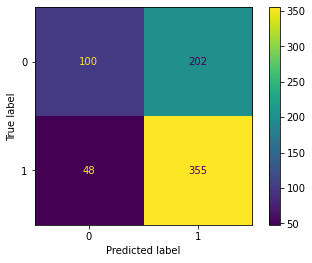

In [35]:
# Evaluating on train data

user_id = 15
user_movie_ratings = train[(train.userId == user_id)]

print("\n\nConfusion Matrix")
predicted_movie_ratings = get_recommendations(user_id, cosine_sim)
df = evaluate(user_movie_ratings, predicted_movie_ratings)

In [34]:
df

,userId,movieId,rating_x,timestamp,rating_scaled,rating_y,user_liked
0,38,2000,3.0,1416075336,-0.513779,4.000000,True
1,38,58559,4.5,1389722628,0.903912,4.250000,True
2,38,2959,4.0,1389722656,0.431348,4.611111,True
3,38,5349,4.0,1416075232,0.431348,3.687500,True
4,38,6365,3.0,1416075350,-0.513779,3.277778,True
5,38,79132,4.0,1389722704,0.431348,4.125000,True
6,38,4993,4.0,1389806551,0.431348,4.277778,True
7,38,1704,3.5,1416075186,-0.041215,3.833333,True
8,38,4973,4.0,1389722650,0.431348,4.583333,True
9,38,47,4.0,1416075134,0.431348,4.428571,True




Confusion Matrix


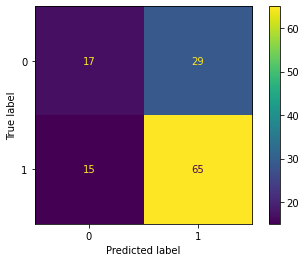

In [28]:
# Evaluating on test data

user_id = 15
user_movie_ratings = test[(test.userId == user_id)]

print("\n\nConfusion Matrix")
predicted_movie_ratings = get_recommendations(user_id, cosine_sim)
df = evaluate(user_movie_ratings, predicted_movie_ratings)

In [29]:
df = df[['userId', 'movieId', 'rating_x', 'rating_y']]
df.columns = ['user_id', 'movieId', 'user_rating', 'model_predicted_rating']
df

,user_id,movieId,user_rating,model_predicted_rating
0,15,1597,2.0,2.500000
1,15,4816,3.0,2.500000
2,15,1962,3.0,3.000000
3,15,3861,3.0,2.166667
4,15,8972,3.5,2.500000
...,...,...,...,...
121,15,1196,5.0,4.214286
122,15,1272,3.5,3.833333
123,15,6016,2.0,4.285714
124,15,16,3.5,3.928571
